In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns


In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE 
from collections import Counter
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier


#Data exploration

In [20]:
data = pd.read_csv('/content/drive/MyDrive/Breast_Cancer.csv')

In [31]:
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4024 non-null   int64
 1   Race                    4024 non-null   int64
 2   Marital Status          4024 non-null   int64
 3   T Stage                 4024 non-null   int64
 4   N Stage                 4024 non-null   int64
 5   6th Stage               4024 non-null   int64
 6   differentiate           4024 non-null   int64
 7   Grade                   4024 non-null   int64
 8   A Stage                 4024 non-null   int64
 9   Tumor Size              4024 non-null   int64
 10  Estrogen Status         4024 non-null   int64
 11  Progesterone Status     4024 non-null   int64
 12  Regional Node Examined  4024 non-null   int64
 13  Reginol Node Positive   4024 non-null   int64
 14  Survival Months         4024 non-null   int64
 15  Status               

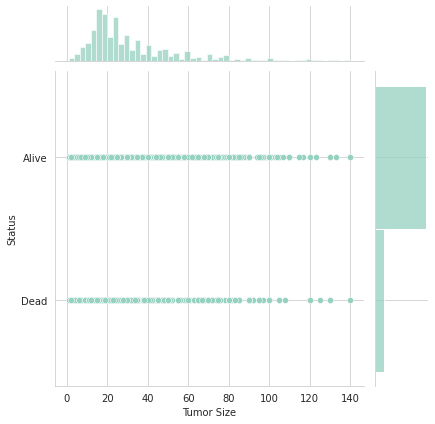

In [ ]:
%matplotlib inline

sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

sns.jointplot(x='Tumor Size',y='Status',data=data)

In [ ]:
sns.lmplot(x='Age', y='Status',data=data)

In [ ]:
sns.pairplot(data)

In [ ]:
data.shape

(4024, 16)

In [ ]:
data['Race'].unique()

array(['White', 'Black', 'Other'], dtype=object)

In [ ]:
data['Marital Status'].unique()

array(['Married', 'Divorced', 'Single ', 'Widowed', 'Separated'],
      dtype=object)

In [ ]:
data['T Stage '].unique()

array(['T1', 'T2', 'T3', 'T4'], dtype=object)

In [ ]:
data['N Stage'].unique()

array(['N1', 'N2', 'N3'], dtype=object)

In [ ]:
data['6th Stage'].unique()

array(['IIA', 'IIIA', 'IIIC', 'IIB', 'IIIB'], dtype=object)

In [ ]:
data['differentiate'].unique()

array(['Poorly differentiated', 'Moderately differentiated',
       'Well differentiated', 'Undifferentiated'], dtype=object)

In [ ]:
data['Grade'].unique()

array(['3', '2', '1', ' anaplastic; Grade IV'], dtype=object)

In [ ]:
data['A Stage'].unique()

array(['Regional', 'Distant'], dtype=object)

In [ ]:
data['Estrogen Status'].unique()

array(['Positive', 'Negative'], dtype=object)

In [ ]:
data['Progesterone Status'].unique()

array(['Positive', 'Negative'], dtype=object)

In [ ]:
data['Status'].unique()

array(['Alive', 'Dead'], dtype=object)

#Feature engineering of numeric attributes

In [5]:
my_df_numeric = data[['Tumor Size', 'Age', 'Regional Node Examined', 'Survival Months','Reginol Node Positive']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

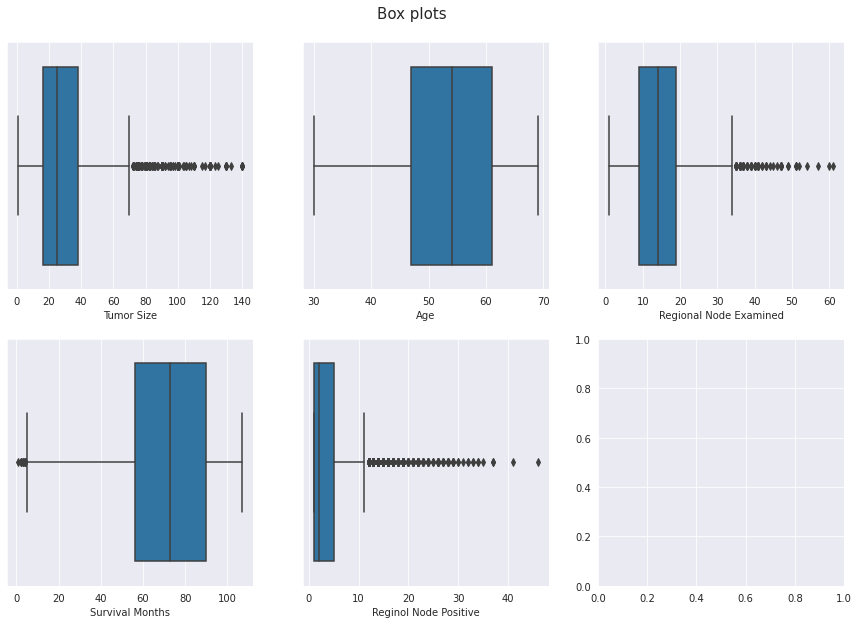

In [6]:
import seaborn as sns
numeric_variables = ['Tumor Size', 'Age', 'Regional Node Examined', 'Survival Months','Reginol Node Positive']
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))
fig.suptitle('Box plots', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), my_df_numeric, numeric_variables):
  sns.boxplot(my_df_numeric[name], ax = ax)

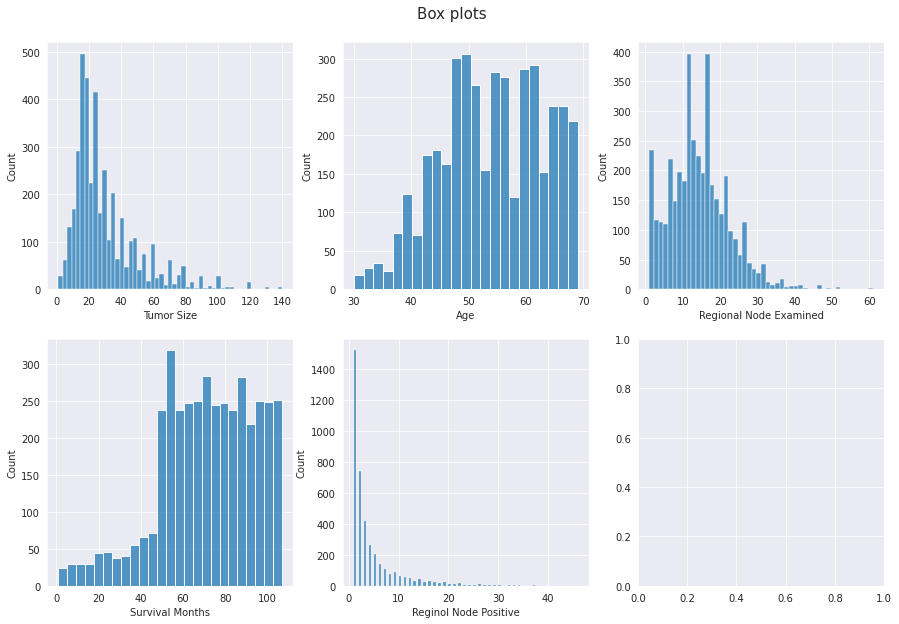

In [7]:
numeric_variables = ['Tumor Size', 'Age', 'Regional Node Examined', 'Survival Months','Reginol Node Positive']
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))
fig.suptitle('Box plots', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), my_df_numeric, numeric_variables):
  sns.histplot(my_df_numeric[name], ax = ax)

In [8]:
non_skewed_data = my_df_numeric[['Survival Months','Age']]
skewed_data = my_df_numeric[['Reginol Node Positive','Regional Node Examined','Tumor Size']]

MinMax Normalisation for non-skewed-data

In [9]:
normalized_data = pd.DataFrame()  

In [10]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
minmax_scale = mms.fit(non_skewed_data)
scaled_variables = minmax_scale.transform(non_skewed_data)

In [11]:
scaled_variables = scaled_variables.T
i=0
for l in list(non_skewed_data.columns) : 
  normalized_data[l]= scaled_variables[i]
  i+=1

In [42]:
normalized_data

,Survival Months,Age
0,0.556604,0.974359
1,0.575472,0.512821
2,0.698113,0.717949
3,0.783019,0.717949
4,0.462264,0.435897
...,...,...
4019,0.452830,0.820513
4020,0.641509,0.666667
4021,0.641509,0.974359
4022,0.669811,0.717949


log normalization + MinMax normalization for skewed_data

In [12]:
import math
def logg(x):
    if x > 0:
        return math.log(x)
    elif x < 0:
        return math.log(x*-1)*-1
    elif x == 0:
        return 0
for f in list(skewed_data.columns) : 
    normalized_data[f] = my_df_numeric[f].map(logg)
    arr = np.array(normalized_data[f])
    minmax_scale = mms.fit(arr.reshape(-1,1))
    normalized_data[f] = minmax_scale.transform(arr.reshape(-1,1))

In [13]:
normalized_data

,Survival Months,Age,Reginol Node Positive,Regional Node Examined,Tumor Size
0,0.556604,0.974359,0.000000,0.773085,0.280533
1,0.575472,0.512821,0.420368,0.641970,0.719467
2,0.698113,0.717949,0.508251,0.641970,0.838412
3,0.783019,0.717949,0.000000,0.168613,0.584901
4,0.462264,0.435897,0.000000,0.267245,0.751485
...,...,...,...,...,...
4019,0.452830,0.820513,0.000000,0.000000,0.444634
4020,0.641509,0.666667,0.543128,0.641970,0.774771
4021,0.641509,0.974359,0.286946,0.583305,0.625509
4022,0.669811,0.717949,0.000000,0.583305,0.765776


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

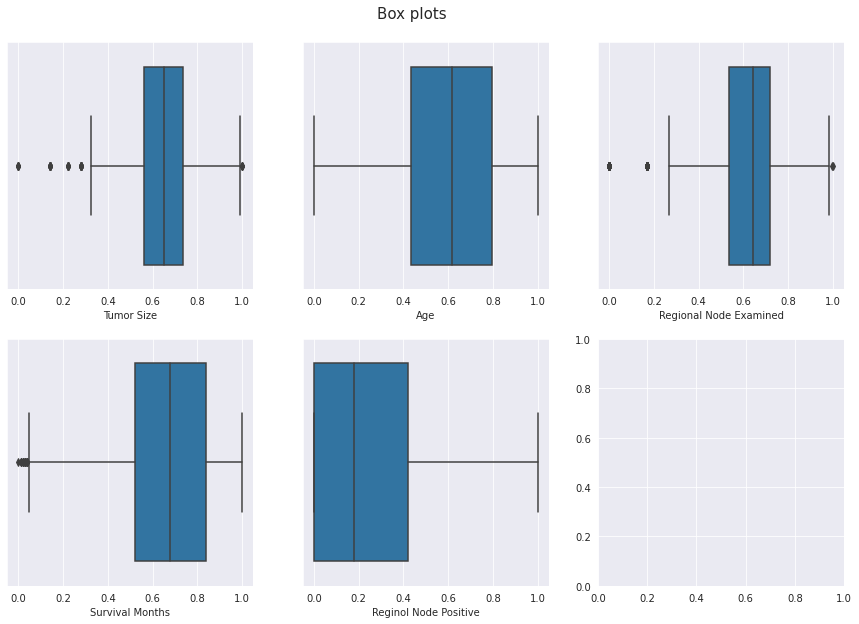

In [15]:
import seaborn as sns
numeric_variables = ['Tumor Size', 'Age', 'Regional Node Examined', 'Survival Months','Reginol Node Positive']
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))
fig.suptitle('Box plots', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), normalized_data, numeric_variables):
  sns.boxplot(normalized_data[name], ax = ax)

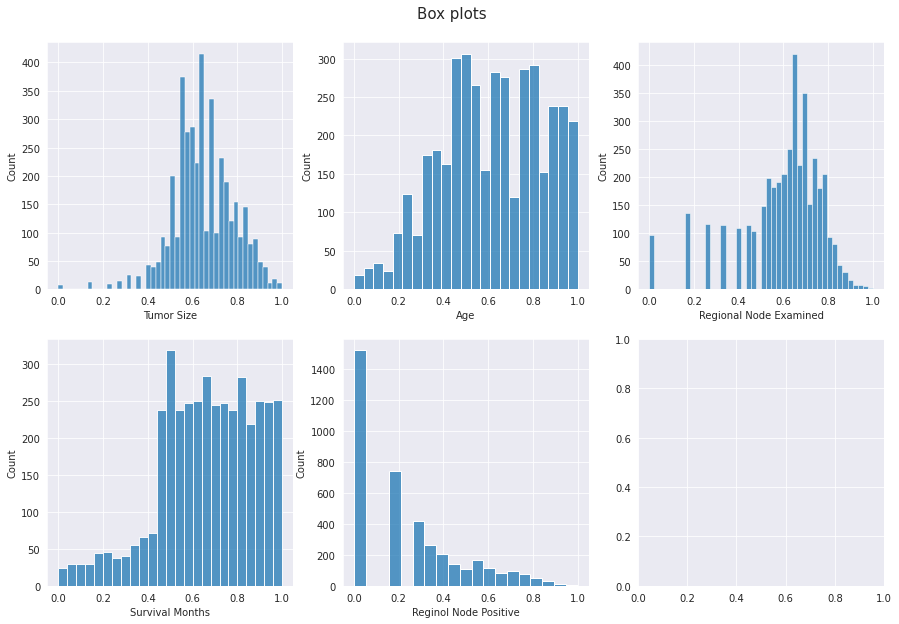

In [16]:
numeric_variables = ['Tumor Size', 'Age', 'Regional Node Examined', 'Survival Months','Reginol Node Positive']
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))
fig.suptitle('Box plots', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), my_df_numeric, numeric_variables):
  sns.histplot(normalized_data[name], ax = ax)



# Feature engineering of categorical attributes



**Label encoder**

In [17]:
from sklearn import preprocessing

In [ ]:
Columns = ['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Estrogen Status','Progesterone Status','Status']
for l in Columns : 
  le = preprocessing.LabelEncoder()
  le.fit(data[l].unique())

  tab = le.transform(data[l])
  for i in range(tab.shape[0]) : 
    data[l][i] = tab[i]

In [23]:
for l in Columns : 
  data[l] = data[l].astype(np.int64)

In [ ]:
data.info()

In [28]:
for l in Columns : 
  normalized_data[l] = data[l]

In [29]:
normalized_data

,Survival Months,Age,Reginol Node Positive,Regional Node Examined,Tumor Size,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
0,0.556604,0.974359,0.000000,0.773085,0.280533,2,1,0,0,0,1,3,1,1,1,0
1,0.575472,0.512821,0.420368,0.641970,0.719467,2,1,1,1,2,0,2,1,1,1,0
2,0.698113,0.717949,0.508251,0.641970,0.838412,2,0,2,2,4,0,2,1,1,1,0
3,0.783019,0.717949,0.000000,0.168613,0.584901,2,1,0,0,0,1,3,1,1,1,0
4,0.462264,0.435897,0.000000,0.267245,0.751485,2,1,1,0,1,1,3,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,0.452830,0.820513,0.000000,0.000000,0.444634,1,1,0,0,0,0,2,1,1,1,0
4020,0.641509,0.666667,0.543128,0.641970,0.774771,2,0,1,1,2,0,2,1,1,1,0
4021,0.641509,0.974359,0.286946,0.583305,0.625509,2,1,1,0,1,0,2,1,1,0,0
4022,0.669811,0.717949,0.000000,0.583305,0.765776,0,0,1,0,1,0,2,1,1,1,0


In [ ]:
data['Status'].value_counts()

0    3408
1     616
Name: Status, dtype: int64

In [ ]:
data['Race'].value_counts()

2    3413
1     320
0     291
Name: Race, dtype: int64

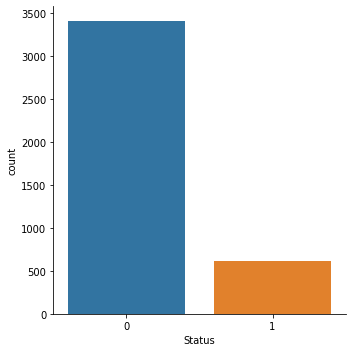

In [ ]:
sns.catplot(data=data, x="Status", kind="count")


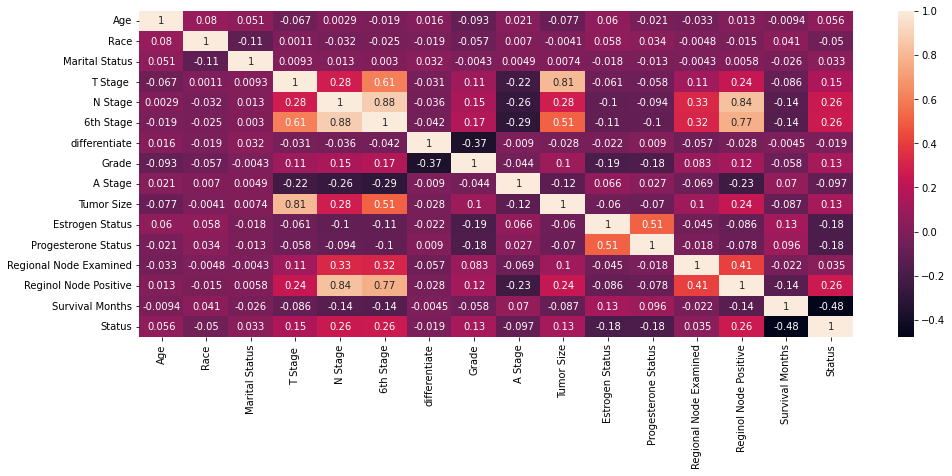

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(data.corr(), annot=True)

**Training**

In [30]:
y= normalized_data['Status']

In [31]:
X = normalized_data[['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months']]

In [32]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X

**Classification models**

**1) Logistic_regression **

In [33]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [34]:
clf.predict(X_test)
clf.score(X_test, y_test)

0.8919254658385093

*2) Cross_validation*

In [35]:
from sklearn.model_selection import cross_val_score

cross_val_score(LogisticRegression(solver = "sag", max_iter=500), X, y, cv=5, scoring="accuracy").mean()

0.8938855412379099

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
lm = cross_val_score(LogisticRegression(solver = "sag", max_iter=500), X, y, cv=5, scoring="accuracy").mean()
lk = cross_val_score(KNeighborsClassifier(15), X, y, cv=5, scoring="accuracy").mean()
print("Logistic regression : ", lm )
print("KNeighborsClassifier : ", lk )

Logistic regression :  0.8938855412379099
KNeighborsClassifier :  0.8581008003460957


*2.1) Shuffle split *

In [37]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(4, test_size=0.2)

cross_val_score(KNeighborsClassifier(), X, y, cv=cv).mean()

0.8531055900621118

In [38]:
def Shuffle_Split (n, size, model, X, y) :

  cv = ShuffleSplit(n, test_size= size)
  l = cross_val_score(model, X, y, cv=cv)
  print("l : ",l)
  return l.mean()

*2.2) Group Kfold*

In [ ]:
gkf = GroupKFold(3)
for train, test in gkf.split(X, y, groups=list(X['Race'])):
  print("%s %s" % (train, test))

In [40]:
from sklearn.model_selection import GroupKFold

cv = GroupKFold(3).split(X_train, y_train, groups=X_train['Race'])
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=cv).mean()

0.8506189503182561

Validation_curve pour trouver la meilleure valeur pour un hyperparamètre donnée

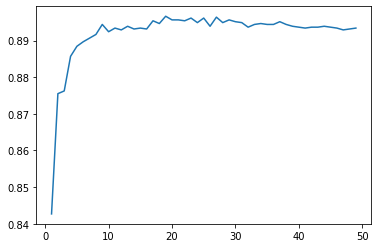

In [ ]:
from sklearn.model_selection import validation_curve

def Best_hyperparameters(model, X, y,hyperparameter,k, cv) : 
  train_score, val_score = validation_curve(model, X, y, param_name = hyperparameter, param_range= k, cv=cv)
  return val_score
k = np.arange(1, 50)
model = KNeighborsClassifier()
vf = Best_hyperparameters(model, X, y,'n_neighbors',k, 5)
plt.plot(k, vf.mean(axis=1))

In [ ]:
max = vf.mean(axis=1).max()
index = list(vf.mean(axis=1)).index(max)
print("la plus grande performance du modèle est ",max," index = ",index)

la plus grande performance du modèle est  0.8966193875343779  index =  18


GridSearchCV

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

def GridSearchCV_KNN(X_train, y_train) : 
  param_grid = {"n_neighbors": np.arange(1,20),
                "metric": ['euclidean', 'cosine', 'manhattan' ]}
  model = KNeighborsClassifier()
  grid = GridSearchCV(model, param_grid, cv=5)
  grid.fit(X_train, y_train)
  return grid

In [42]:
grid = GridSearchCV_KNN(X, y)

In [43]:
grid.best_score_

0.8603380612465621

In [ ]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 19}

In [ ]:
model = grid.best_estimator_ 

In [ ]:
model.score(X_test, y_test)

0.9043478260869565

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix (y_test, model.predict(X_test))

array([[655,  13],
       [ 73,  64]])

In [ ]:
param_grid = {"penalty": ['l1', 'l2', 'elasticnet'],
              "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga' ]}

model = LogisticRegression(max_iter=500)
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

{'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
grid.best_score_

0.8977942099823227

In [ ]:
lm = cross_val_score(KNeighborsClassifier(15), X_train, y_train, cv=5, scoring="accuracy").mean()


2) SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE 
from collections import Counter

sm = SMOTE(k_neighbors=5)
print('Original dataset shape %s' % Counter(y))
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 3408, 1: 616})
Resampled dataset shape Counter({0: 3408, 1: 3408})


In [ ]:
from sklearn.model_selection import train_test_split 
X_train_eq, X_test_eq, y_train_eq, y_test_eq = train_test_split(X_res, y_res, test_size=0.2)

In [ ]:
grid = GridSearchCV_KNN(X, y)
n = grid.best_params_['n_neighbors']
print(n)
lk = cross_val_score(KNeighborsClassifier(n), X, y, cv=5, scoring="accuracy")
grid.best_score_
print(lk.mean())


19
0.8966193875343779


In [ ]:
grid.best_score_


0.8968672167114736

In [ ]:
model = grid.best_estimator_ 


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix (y_test, model.predict(X_test))

array([[646,  22],
       [ 77,  60]])

In [ ]:
Shuffle_Split(4,0.2 ,KNeighborsClassifier(15), X, y)

0.8978260869565218

In [ ]:
cv = ShuffleSplit(4, test_size= 0.2)
l = cross_val_score(KNeighborsClassifier(15), X, y, cv=cv)

In [ ]:
l.mean()

0.8916149068322982

In [ ]:
cv.split(X)

**Courbe de ROC**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

def ROC_Courbe (model, X_test, y_test) :
  fpr_array, tpr_array, threshold_array = roc_curve(
    y_true=y_test, y_score=model.predict(X_test))
  plt.plot(fpr_array, tpr_array)
  plt.show()


**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(C = 1, gamma=0.05))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, gamma=0.05))])

In [ ]:
clf.score(X_test,y_test)

0.8869565217391304

In [ ]:
clf.fit(X_train_eq, y_train_eq)
clf.score(X_test_eq,y_test_eq)

0.842375366568915

In [ ]:
#grid search in order to find the best parameters of SVM
from sklearn.model_selection import GridSearchCV

param_grid = {"C": np.arange(1.0,10.0),  "kernel" :['rbf', 'sigmoid'], "gamma": np.arange(0.05,1.0,0.05)}
model = SVC()
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1., 2., 3., 4., 5., 6., 7., 8., 9.]),
                         'gamma': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'kernel': ['rbf', 'sigmoid']})

In [ ]:
grid

In [ ]:
model = grid.best_params_ 
print(model)

{'C': 1.0, 'gamma': 0.05, 'kernel': 'rbf'}


In [ ]:
clf = make_pipeline(StandardScaler(), SVC(C=1.0,kernel='rbf'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)

param_grid = {"C": np.arange(1.0,10.0),  "kernel" :['rbf', 'sigmoid']}
model = SVC()
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train_minmax, y_train)

grid.best_params_ 

{'C': 3.0, 'kernel': 'rbf'}

In [ ]:
grid.best_score_

0.8953063570414305

In [ ]:
clf.score(X_test,y_test)

0.8919254658385093

In [ ]:
grid.best_score_

0.8487113974672293

In [ ]:
grid.score(X_test, y_test)

0.8397515527950311

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


Shuffle_Split (4, 0.2, SVC(C=1.0,kernel='rbf'), X, y)

l :  [0.89565217 0.90559006 0.89689441 0.88198758]


0.8950310559006212

***MLP***

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(max_iter=500, activation='logistic', batch_size = 16, solver='adam').fit(X_train, y_train)
clf.score(X_test, y_test)

0.8993788819875776

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {"batch_size": np.arange(2,200) }
model = MLPClassifier(max_iter=500, activation='logistic', solver='adam')
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)

In [ ]:
model = grid.best_params_ 
print(model)

In [ ]:
grid.score(X_test, y_test)

0.8956521739130435

In [ ]:
ROC_Courbe (grid, X_test, y_test)

***Decision Tree***

In [ ]:
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier(splitter = "best", max_depth=4)
clf = clf.fit(X_train, y_train)

In [ ]:
clf.score(X_test,y_test)

0.8857142857142857

In [ ]:
tree.plot_tree(clf)

In [ ]:
param_grid = {"splitter": [ "best", 'random'],
              "criterion": ['gini', 'entropy']}

model = tree.DecisionTreeClassifier()
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']})

In [ ]:
model = grid.best_params_ 
print(model)

{'criterion': 'entropy', 'splitter': 'random'}


In [ ]:
grid.score(X_test, y_test)

0.8397515527950311



---





> **Voting Classifier**



In [ ]:
clf1 = MLPClassifier(max_iter=500, activation='logistic', solver='adam')
clf2 = SVC(C=1.0,kernel='rbf', probability=True)
clf3 = LogisticRegression(random_state=0)

clf_voting = VotingClassifier(estimators=[('mlp', clf1), ('svc', clf2), ('lr', clf3)], voting='hard')
clf_voting.fit(X_train, y_train)
clf_voting.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8968944099378882

In [ ]:
clf_voting_soft = VotingClassifier(estimators=[('mlp', clf1), ('svc', clf2), ('lr', clf3)], voting='soft')
clf_voting_soft.fit(X_train, y_train)
clf_voting_soft.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8981366459627329

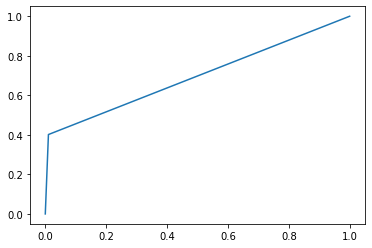

In [ ]:
ROC_Courbe(clf_voting, X_test, y_test)


**Bagging classifier**

In [ ]:
from sklearn.ensemble import BaggingClassifier

bg_clf = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0).fit(X_train, y_train)
bg_clf.score(X_test,y_test)

0.893167701863354

In [ ]:
bg_clf = BaggingClassifier(base_estimator=clf2,n_estimators=10, random_state=0).fit(X_train, y_train)
bg_clf.score(X_test,y_test)

0.893167701863354

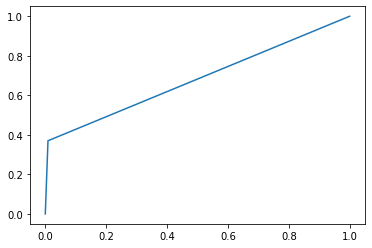

In [ ]:
ROC_Courbe (bg_clf, X_test, y_test)

**RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier(max_depth=8, random_state=0)
RF_clf.fit(X_train, y_train)
RF_clf.score(X_test,y_test)

0.901863354037267

In [ ]:
param_grid = {"max_depth": np.arange(1,10)}
model = RandomForestClassifier()
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)
print("the best parameters are : ",grid.best_params_)
print("the best score is  : ", grid.best_score_)



the best parameters are :  {'max_depth': 8}
the best score is  :  0.9086671560909171


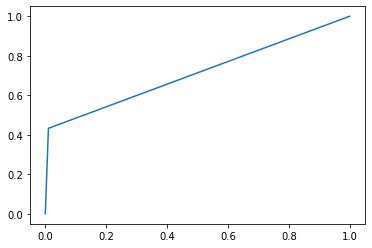

In [ ]:
ROC_Courbe (RF_clf, X_test, y_test)